# Mask with its application in Bio

# Simple example with Mask

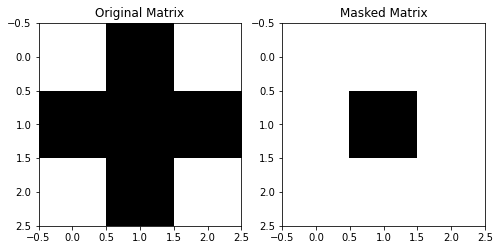

In [16]:
import torch
import matplotlib.pyplot as plt

# Generate a 3x3 matrix of random 0's and 1's
matrix = torch.randint(low=0, high=2, size=(3, 3))

# Create a binary mask where the values are True in the center of the matrix and False elsewhere
mask = torch.tensor([[1, 0, 1], [0, 1, 0], [1, 0, 1]], dtype=torch.bool)

# Apply the mask to the matrix by setting the values outside the region of interest to 0
masked_matrix = torch.where(mask, matrix, torch.zeros_like(matrix))

# Display the original matrix and the masked matrix as binary images
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

axs[0].imshow(matrix, cmap='binary')
axs[0].set_title("Original Matrix")

axs[1].imshow(masked_matrix, cmap='binary')
axs[1].set_title("Masked Matrix")

plt.show()

tensor([[[ 56, 125,   8],
         [244,  81,  94],
         [174, 168, 111]],

        [[222, 227, 129],
         [107, 189,  62],
         [ 76,  12,  90]]])


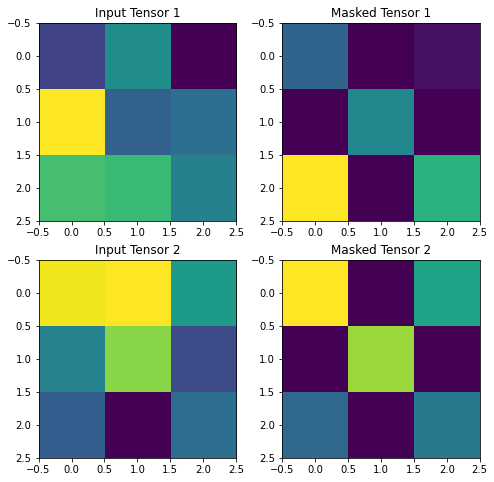

In [15]:
import torch
import matplotlib.pyplot as plt

# Create a random tensor of shape (2, 3, 3) with values between 0 and 255
a = torch.randint(0, 255, (2, 3, 3))

# Print the tensor
print(a)

# Create a binary mask where the values are True at the center of the tensor and False elsewhere
mask = torch.tensor([[1, 0, 1], [0, 1, 0], [1, 0, 1]], dtype=torch.bool)

# Apply the mask to the tensor by setting the values outside the region of interest to 0
b = torch.where(mask, a, torch.zeros_like(a))

# Plot the input tensor and the masked tensor as images
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

axs[0, 0].imshow(a[0])
axs[0, 0].set_title("Input Tensor 1")
axs[0, 1].imshow(b[0])
axs[0, 1].set_title("Masked Tensor 1")
axs[1, 0].imshow(a[1])
axs[1, 0].set_title("Input Tensor 2")
axs[1, 1].imshow(b[1])
axs[1, 1].set_title("Masked Tensor 2")

plt.show()

## Application for a real image

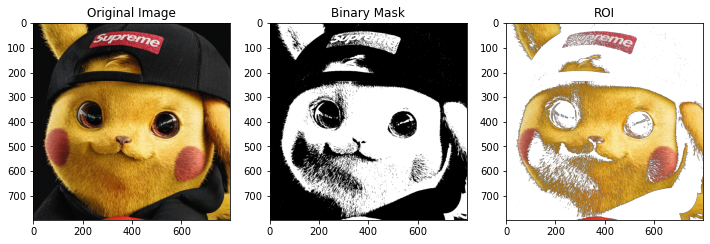

In [14]:
import torch
import matplotlib.pyplot as plt

# Load an RGB image
img = plt.imread('pika.png')
img = torch.tensor(img)

# Compute the grayscale intensity of the image
gray_img = torch.mean(img, dim=-1)

# Set a threshold value for the intensity
threshold = 0.5

# Create a binary mask where the intensity is above the threshold
mask = gray_img > threshold

# Extract the ROI from the image using the mask
roi = img * mask.unsqueeze(-1)

# Plot the original image, the binary mask, and the ROI
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

axs[0].imshow(img)
axs[0].set_title("Original Image")

axs[1].imshow(mask, cmap='gray')
axs[1].set_title("Binary Mask")

axs[2].imshow(roi)
axs[2].set_title("ROI")

plt.show()

## Text Extraction 
Suppose we now have a figure with letters and background: 
<div align="left">
<img src=word.jpg width=30%>
</div>
We want to tick out the colorful background and remain the words.

In [21]:
import cv2
import numpy as np
# Load the image
img = cv2.imread('word.jpg')
img= img[:,:,::-1] # Tansfer BGR read by cv2 to RGB


# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Blur the image to reduce noise
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# Perform adaptive thresholding to obtain a binary image
thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 4)

# Find the contours of the binary image
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a mask from the contours
mask = np.zeros(img.shape[:2], np.uint8)
for cnt in contours:
    cv2.drawContours(mask, [cnt], 0, 255, -1)

# Apply the mask to the original image
result = cv2.bitwise_and(img, img, mask=mask)

# Invert the result image
result = cv2.subtract(np.full(img.shape, 255, dtype=np.uint8), result)

# Fill in the contours to obtain solid black text
for cnt in contours:
    cv2.drawContours(result, [cnt], 0, 0, -1)

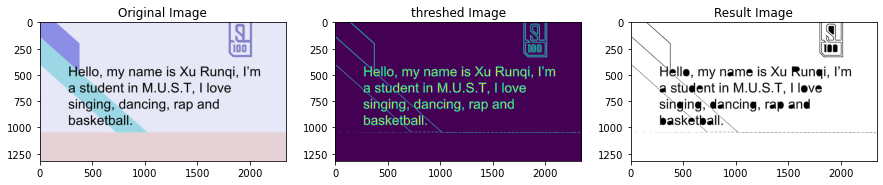

In [22]:
# Show the results and processing procedure
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(img)
ax[0].set_title('Original Image')

ax[1].imshow(thresh)
ax[1].set_title('threshed Image')

ax[2].imshow(result)
ax[2].set_title('Result Image')

plt.show()

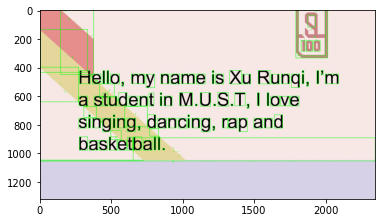

In [23]:
# Load the image
img = cv2.imread('word.jpg')

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# Perform adaptive thresholding using BTS
threshold = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 2)

# Find contours
contours, _ = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a copy of the original image for drawing bounding boxes
result = img.copy()

# Loop over contours and draw bounding boxes
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(result, (x, y), (x+w, y+h), (0, 255, 0), 2)

# Display the result
plt.imshow(result)


In [24]:
import cv2
import pytesseract

# Load the image
img = cv2.imread('word.jpg')

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# Perform adaptive thresholding using BTS
threshold = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 2)

# Perform OCR using Tesseract
config = ('-l eng --oem 1 --psm 3')
words = pytesseract.image_to_string(threshold, config=config)

# Print the recognized words
print("The result words recognized is:")
print(words)


The result words recognized is:
\ q
IN 100 |
\ Aelo, my name is Xu Rundi, I’m

‘Na student in M.U.S.T, | love
singing, dancing, rap and

basketball.




## Mask use in the cell- Segmentation

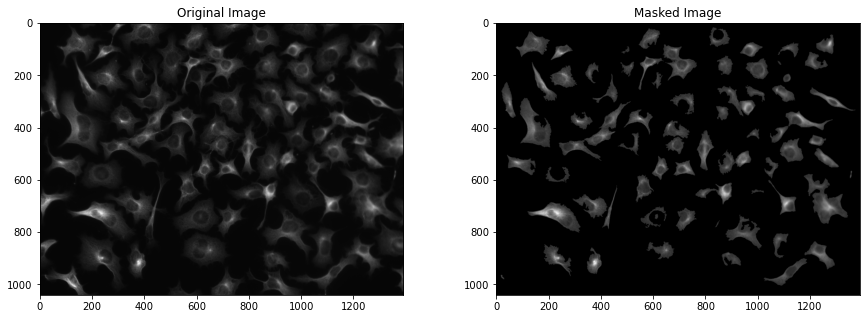

In [16]:
import numpy as np
from skimage import io, filters, morphology, segmentation
from scipy import ndimage
import matplotlib.pyplot as plt

# Load the image
image = io.imread('cell_image.tif')

# Apply a Gaussian blur to smooth the image and reduce noise
blurred = filters.gaussian(image, sigma=1)

# Threshold the image using Otsu's method
threshold = filters.threshold_otsu(blurred)
binary = blurred > threshold

# Remove small objects and fill in holes in the binary image
cleaned = morphology.remove_small_objects(binary, min_size=100)
filled = ndimage.binary_fill_holes(cleaned)

# Apply a mask to the original image to isolate the cells
mask = segmentation.clear_border(filled)
masked = np.zeros_like(image)
masked[mask] = image[mask]

# Plot the original image and the masked image side by side
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original Image')

axs[1].imshow(masked, cmap='gray')
axs[1].set_title('Masked Image')

plt.show()

<ipython-input-10-8cbb65d87ed1>:10: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  image_gray = color.rgb2gray(image)


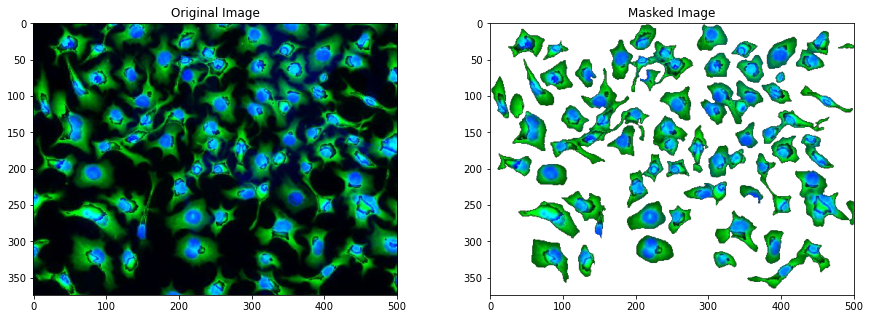

In [10]:
import numpy as np
from skimage import io, filters, morphology, segmentation, color
from scipy import ndimage
import matplotlib.pyplot as plt

# Load the image
image = io.imread('cell_image2.png')

# Convert the image to grayscale
image_gray = color.rgb2gray(image)

# Apply a Gaussian blur to smooth the image and reduce noise
blurred = filters.gaussian(image_gray, sigma=1)

# Threshold the image using Otsu's method
threshold = filters.threshold_otsu(blurred)
binary = blurred > threshold

# Remove small objects and fill in holes in the binary image
cleaned = morphology.remove_small_objects(binary, min_size=100)
filled = ndimage.binary_fill_holes(cleaned)

# Apply a mask to the original image to isolate the cells
mask = segmentation.clear_border(filled)
masked = np.zeros_like(image)
masked[mask] = image[mask]

# Plot the original image and the masked image side by side
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].imshow(image)
axs[0].set_title('Original Image')

axs[1].imshow(masked)
axs[1].set_title('Masked Image')

plt.show()

## Cell Mask by Machine learning

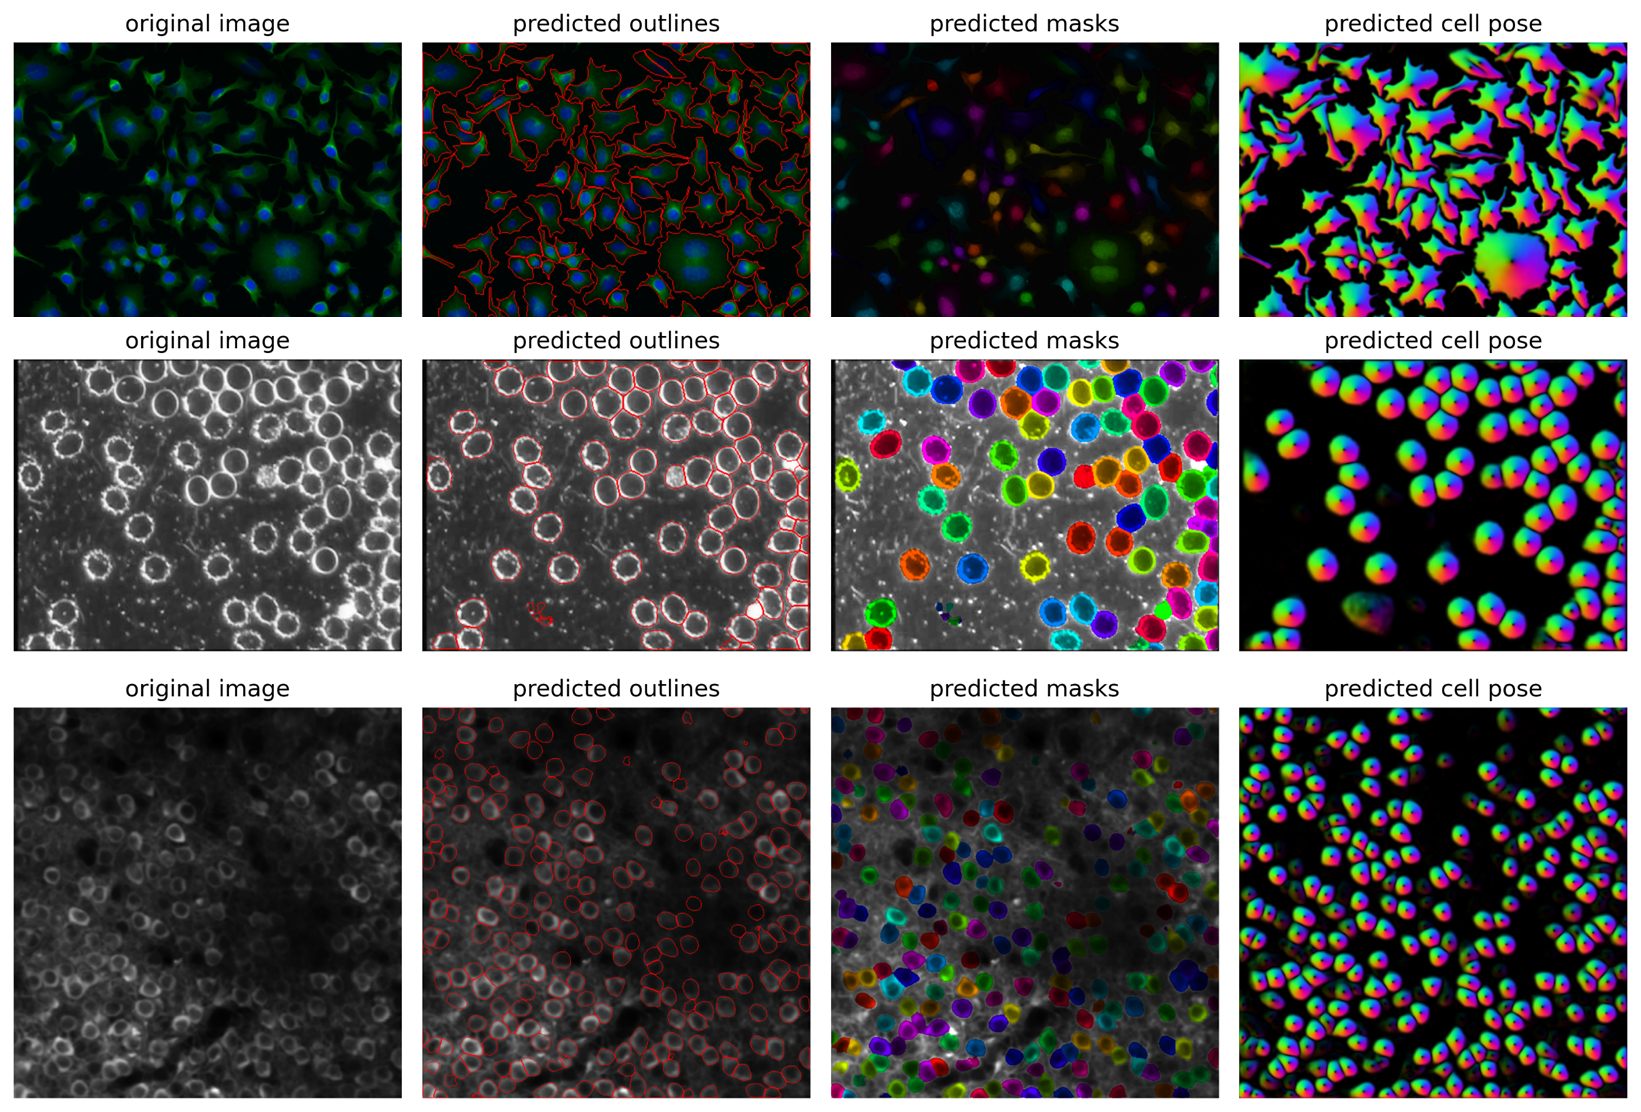